In [1]:
import pandas as pd
data=pd.read_excel('Data_Wordle_All_Features.xlsx',sheet_name='New')
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,w5,Vowel_fre,Consonant_fre,Speech,Same_letter_fre,w1_fre,w2_fre,w3_fre,w4_fre,w5_fre
0,2022-01-07,202,slump,80630,1362,1,3,23,39,24,...,16,1,4,7,0,0.0555,0.0552,0.0366,0.0322,0.0327
1,2022-01-08,203,crank,101503,1763,1,5,23,31,24,...,11,1,4,7,0,0.0474,0.0751,0.0856,0.0641,0.0084
2,2022-01-09,204,gorge,91477,1913,1,3,13,27,30,...,5,2,3,7,2,0.0230,0.0712,0.0751,0.0230,0.1142
3,2022-01-10,205,query,107134,2242,1,4,16,30,30,...,25,2,3,7,0,0.0023,0.0366,0.1142,0.0751,0.0200
4,2022-01-11,206,drink,153880,3017,1,9,35,34,16,...,11,1,4,12,0,0.0313,0.0751,0.0794,0.0641,0.0084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,2023-04-21,671,kayak,17171,1768,0,2,13,37,33,...,11,2,3,7,4,0.0084,0.0856,0.0200,0.0856,0.0084
468,2023-04-22,672,broke,18527,1840,1,9,24,29,23,...,5,2,3,13,0,0.0212,0.0751,0.0712,0.0084,0.1142
469,2023-04-23,673,unzip,16915,1720,0,2,15,34,31,...,16,2,3,3,0,0.0366,0.0641,0.0024,0.0794,0.0327
470,2023-04-24,674,ditto,18104,1815,0,4,24,41,24,...,15,2,3,7,2,0.0313,0.0794,0.0746,0.0746,0.0712


In [2]:
dataNew=data[['Contest number','Number of reported results','Number in hard mode','1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Speech','Same_letter_fre','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']]

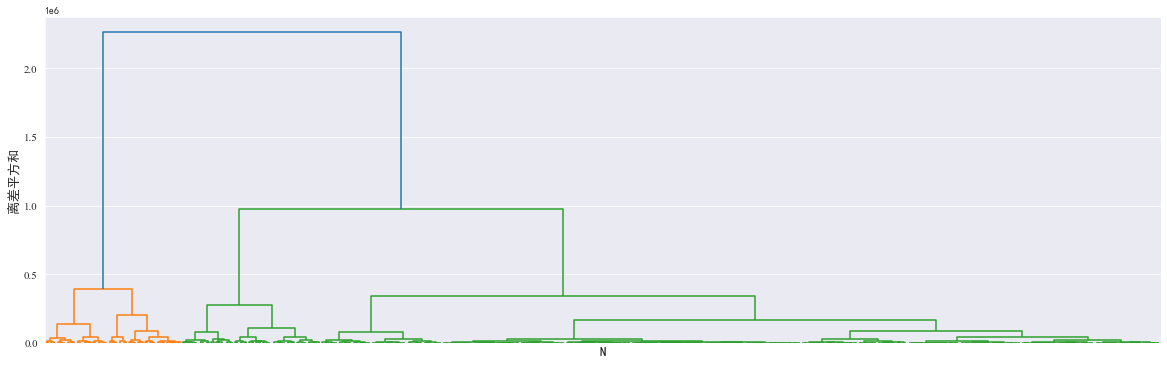

In [3]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
dendrogram = sch.dendrogram(sch.linkage(dataNew, method = 'ward'))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.xlabel('N',fontsize=13)
plt.ylabel('离差平方和',fontsize=13)
plt.xticks([],font='Times New Roman',fontsize=11)
plt.yticks(font='Times New Roman',fontsize=11)
plt.savefig("层次聚类树状图.pdf")

In [4]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

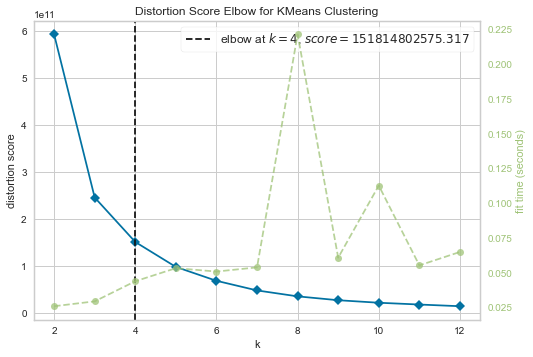

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
model = KElbowVisualizer(KMeans(), k=12)
model.fit(dataNew)
model.poof()

In [6]:
n_clusters = 4
cluster = KMeans(n_clusters = n_clusters, random_state = 0).fit(dataNew)
#重要属性labels_，查看聚好的类别，每个样本所对应的类
y_pred = cluster.labels_
y_pred

array([0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
silhouette_score(dataNew, y_pred)

0.7059121437298326

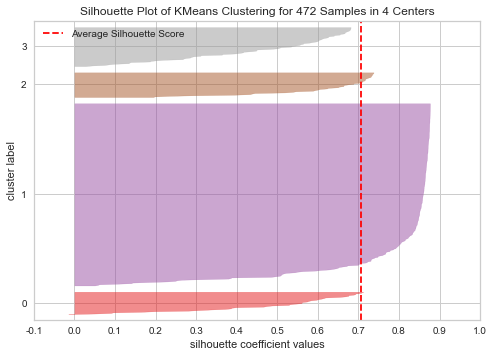

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 472 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
# 绘制轮廓系数
model = SilhouetteVisualizer(KMeans(4))
model.fit(dataNew)
model.poof()

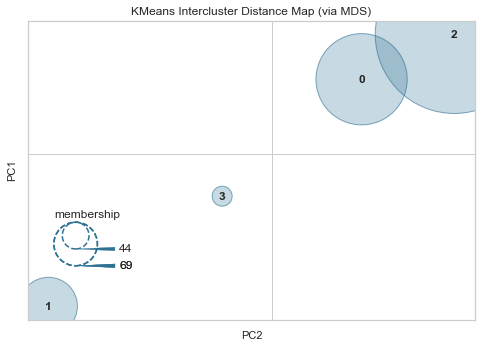

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [9]:
# 绘制聚类结果
model = InterclusterDistance(KMeans(4))
model.fit(dataNew)
model.poof()

In [ ]:
EERIE=pd.read_csv('EERIE_result.csv')
EERIE

In [ ]:
# EERIE_N=EERIE[['Contest number','Number of reported results','Number in hard mode','1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Speech','Same_letter_fre','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']]
# EERIE_N

In [ ]:
dataNew['Result']=y_pred
dataNew

In [ ]:
# import sklearn.preprocessing as sp
# StandardTransformScaler = sp.StandardScaler()
# StandardTransformScaler = StandardTransformScaler.fit(dataNew)
# StandardTransform = StandardTransformScaler.transform(dataNew)
# StandardTransform = pd.DataFrame(StandardTransform)
# StandardTransform.columns = ['Contest number','Number of reported results','Number in hard mode','1 try','2 tries','3 tries','4 tries','5 tries','6 tries','7 or more tries (X)','w1','w2','w3','w4','w5','Vowel_fre','Consonant_fre','Speech','Same_letter_fre','w1_fre','w2_fre','w3_fre','w4_fre','w5_fre']
# StandardTransform